<a href="https://colab.research.google.com/github/victornietol/MetodosNumericos_1360/blob/main/Tema8_PolinomioInterpolador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1, 1, 1, 1, 6] ------
[8, 4, 2, 1, 4] ------
[27, 9, 3, 1, 7] ------
[216, 36, 6, 1, 1] ------
Solución 1 = -0.7499999999999982
Solución 2 = 6.999999999999989
Solución 3 = -17.749999999999982
Solución 4 = 17.49999999999999


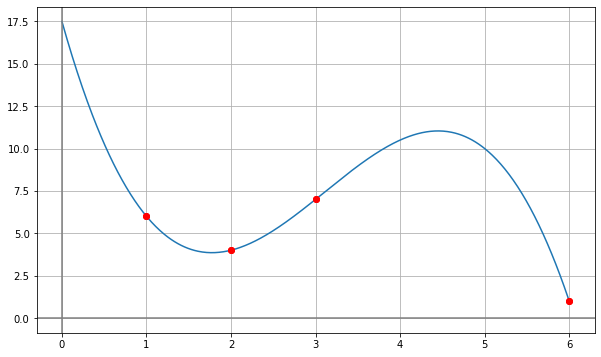

In [36]:
# Código con apuntes

import numpy as np
import matplotlib.pyplot as plt

def polinomio_inter(num_coordenadas, lista_coordenadas):
  matriz = [[0 for i in range(num_coordenadas)] for i in range(num_coordenadas)]
  b = [0 for x in range(num_coordenadas)]
  x = np.arange(0.0,6.0,0.01)     # Los valores del intervalo de x para la grafica deben adecuarse según el problema
  y = 0

  for ren in range(num_coordenadas):        # Guardando las coordenadas en una matriz 
    b[ren] = lista_coordenadas[ren][1]
    for col in range(num_coordenadas):
      matriz[ren][col] = lista_coordenadas[ren][0]

  for ren in range(num_coordenadas):      # Elevando los valores de la matriz a una potencia determinada
    pot = num_coordenadas -1
    for col in range(num_coordenadas):
      matriz[ren][col] **= pot 
      pot -= 1

  for ren in range(num_coordenadas):    # Agregando los valores finales a la matriz para poder realizar Gauss-Jordan
    matriz[ren].append(b[ren])

  for ren in range(num_coordenadas):    # Mostrar la matriz (Se debe omitir, solo es para supervisar preoceso)
    print(matriz[ren],"------")

  n = num_coordenadas                  # Aplicando Gauss-Jordan a la matriz
  for i in range(n):     
    if matriz[i][i] == 0:
      cont = 1
      while matriz[i][i] == 0:
        if matriz[i+cont][i] != 0:
          aux = matriz[i] 
          matriz[i] = matriz[i+cont]
          matriz[i+cont] = aux
        else:
          cont += 1

    if matriz[i][i] < 1:
      aux1 = matriz[i][i]
      for j in range(n+1):
        matriz[i][j] =   (-1/aux1) * (matriz[i][j])   
      
    if matriz[i][i] > 1:
      aux2 = matriz[i][i]
      for j in range(n+1):
        matriz[i][j] =   (1/aux2) * (matriz[i][j])  

    if matriz[i][i] == -1:
      for j in range(n+1):
        matriz[i][j] = (-1) * matriz[i][j]

    if matriz[i][i] == 1 :
        for index in range(i+1,n):
          if matriz [index][i] == 0:
            pass
          else:
            aux3 = matriz[index][i]
            for j in range(n+1):
              matriz[index][j] = matriz[index][j] - ( aux3 * (matriz[i][j]) )

        for index in range(i-1,-1,-1):
          if matriz [index][i] == 0:
            pass
          else:
            aux3 = matriz[index][i]
            for j in range(n+1):
              matriz[index][j] = matriz[index][j] - ( aux3 * (matriz[i][j]) )
    
  for ren in range(n):
    print(f"Solución {ren+1} = {matriz[ren][n]}")   # Soluciones Gauss - Jordan

  pot = num_coordenadas -1                         # Obteniendo el valor de y para poder graficar
  for ren in range(num_coordenadas):
    y += matriz[ren][num_coordenadas]*(x**pot)
    pot -= 1

  plt.figure(figsize = (10,6))           # Estableciendo tamñano de la grafica
  plt.plot(x,y)                          # Graficando curva
  for ren in range(num_coordenadas):     # Graficando puntos 
    plt.plot( [lista_coordenadas[ren][0], lista_coordenadas[ren][0]] , [lista_coordenadas[ren][1], lista_coordenadas[ren][1]] , marker = 'o', color = 'red')

  plt.axhline(0, color = 'gray')
  plt.axvline(0, color = 'gray')
  plt.grid()                            # Agregando cuadricula

  return plt.show()
#  for ren in range(num_coordenadas):        ------> mostrar estado de la matriz
#    print(matriz[ren],b[ren])

polinomio_inter(4,[(1,6) , (2,4) , (3,7) , (6,1)])

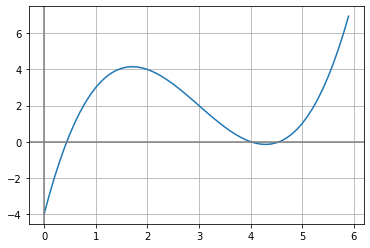

In [11]:
# Graficar

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0,6.0,0.1)
y = 0.4999999999999998*(x**3) - 4.5*(x**2) + 11*x -4

plt.plot(x,y)
plt.axhline(0, color = 'gray')
plt.axvline(0, color = 'gray')
plt.grid()

plt.show()

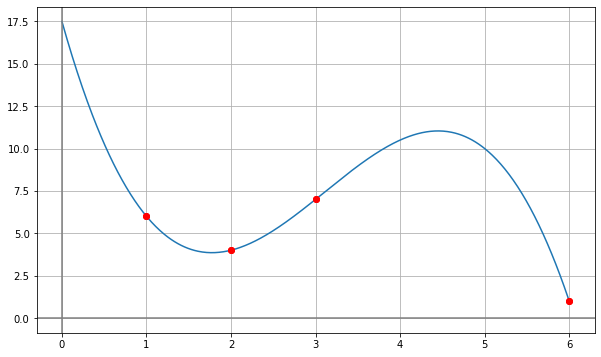

In [41]:
# Ejercicio 3 

import numpy as np
import matplotlib.pyplot as plt

def polinomio_inter(num_coordenadas, lista_coordenadas):
  matriz = [[0 for i in range(num_coordenadas)] for i in range(num_coordenadas)]
  b = [0 for x in range(num_coordenadas)]
  x = np.arange(0.0,6.0,0.01)
  y = 0

  for ren in range(num_coordenadas):
    b[ren] = lista_coordenadas[ren][1]
    for col in range(num_coordenadas):
      matriz[ren][col] = lista_coordenadas[ren][0]

  for ren in range(num_coordenadas):
    pot = num_coordenadas -1
    for col in range(num_coordenadas):
      matriz[ren][col] **= pot 
      pot -= 1

  for ren in range(num_coordenadas):
    matriz[ren].append(b[ren])

  n = num_coordenadas
  for i in range(n):     
    if matriz[i][i] == 0:
      cont = 1
      while matriz[i][i] == 0:
        if matriz[i+cont][i] != 0:
          aux = matriz[i] 
          matriz[i] = matriz[i+cont]
          matriz[i+cont] = aux
        else:
          cont += 1

    if matriz[i][i] < 1:
      aux1 = matriz[i][i]
      for j in range(n+1):
        matriz[i][j] =   (-1/aux1) * (matriz[i][j])   
      
    if matriz[i][i] > 1:
      aux2 = matriz[i][i]
      for j in range(n+1):
        matriz[i][j] =   (1/aux2) * (matriz[i][j])  

    if matriz[i][i] == -1:
      for j in range(n+1):
        matriz[i][j] = (-1) * matriz[i][j]

    if matriz[i][i] == 1 :
        for index in range(i+1,n):
          if matriz [index][i] == 0:
            pass
          else:
            aux3 = matriz[index][i]
            for j in range(n+1):
              matriz[index][j] = matriz[index][j] - ( aux3 * (matriz[i][j]) )

        for index in range(i-1,-1,-1):
          if matriz [index][i] == 0:
            pass
          else:
            aux3 = matriz[index][i]
            for j in range(n+1):
              matriz[index][j] = matriz[index][j] - ( aux3 * (matriz[i][j]) )

  pot = num_coordenadas -1
  for ren in range(num_coordenadas):
    y += matriz[ren][num_coordenadas]*(x**pot)
    pot -= 1

  plt.figure(figsize = (10,6))
  plt.plot(x,y)
  for ren in range(num_coordenadas):
    plt.plot( [lista_coordenadas[ren][0], lista_coordenadas[ren][0]] , [lista_coordenadas[ren][1], lista_coordenadas[ren][1]] , marker = 'o', color = 'red')

  plt.axhline(0, color = 'gray')
  plt.axvline(0, color = 'gray')
  plt.grid()

  return plt.show()

polinomio_inter(4,[(1,6) , (2,4) , (3,7) , (6,1)])